<a href="https://colab.research.google.com/github/rroxy08/CE888/blob/master/assignment2/ass2_covariate_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#######################      home-credit-default-risk   #########################

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random as rd
import os
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KernelDensity
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from scipy.ndimage.filters import gaussian_filter
from scipy.stats import norm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

#drive.mount('/content/gdrive')
os.environ['KAGGLE_USERNAME'] = "khaledabegum"
os.environ['KAGGLE_KEY'] = "3ab75f2bb1de78f9addea9a3f5079ec9"


In [3]:
#!kaggle competitions download --force -c sberbank-russian-housing-market
#!kaggle competitions download --force -c sberbank-russian-housing-market
!kaggle competitions download --force -c home-credit-default-risk


 97% 55.0M/56.8M [00:00<00:00, 60.7MB/s]
100% 56.8M/56.8M [00:00<00:00, 144MB/s] 
 69% 25.0M/36.1M [00:00<00:00, 59.5MB/s]
100% 36.1M/36.1M [00:00<00:00, 120MB/s] 
 86% 93.0M/109M [00:00<00:00, 96.6MB/s]
100% 109M/109M [00:00<00:00, 149MB/s]  
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 171MB/s]
 89% 68.0M/76.3M [00:00<00:00, 83.7MB/s]
100% 76.3M/76.3M [00:00<00:00, 104MB/s] 
 98% 266M/271M [00:01<00:00, 128MB/s]
100% 271M/271M [00:01<00:00, 148MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 32.9MB/s]
 35% 13.0M/36.8M [00:00<00:00, 64.8MB/s]
100% 36.8M/36.8M [00:00<00:00, 123MB/s] 
 89% 86.0M/96.7M [00:00<00:00, 125MB/s]
100% 96.7M/96.7M [00:00<00:00, 132MB/s]
 86% 5.00M/5.81M [00:00<00:00, 46.2MB/s]
100% 5.81M/5.81M [00:00<00:00, 36.7MB/s]


In [4]:
from zipfile import ZipFile

file_names = ["/content/application_train.csv.zip","/content/application_test.csv.zip"]

for file_name in file_names:
  with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

done
done


In [5]:
root_path1 = '/content/application_train.csv' 
root_path2 = '/content/application_test.csv' 
df_train=pd.read_csv(root_path1)
df_test=pd.read_csv(root_path2)

<bound method DataFrame.count of         SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002  ...                         1.0
1           100003  ...                         0.0
2           100004  ...                         0.0
3           100006  ...                         NaN
4           100007  ...                         0.0
...            ...  ...                         ...
307506      456251  ...                         NaN
307507      456252  ...                         NaN
307508      456253  ...                         1.0
307509      456254  ...                         0.0
307510      456255  ...                         1.0

[307511 rows x 122 columns]>

In [34]:
df_tr=df_train.copy()
df_ts=df_test.copy()
df_tr.count
df_tr.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#preprocessing of data, fillup the NAN value. Since 'year' data types are float so mode is used to fill NAN samples.

for i in df_tr.columns:
    if (df_tr[i].dtype == 'object'or df_tr[i].dtype == 'float'):
      df_tr[i] = df_tr[i].fillna(df_tr[i].mode().iloc[0])
    if (df_tr[i].dtype == 'int'):
      df_tr[i] = df_tr[i].fillna(np.mean(df_tr[i]))

for i in df_ts.columns:
    if (df_ts[i].dtype == 'object' or df_ts[i].dtype == 'float'):
      df_ts[i] = df_ts[i].fillna(df_ts[i].mode().iloc[0])
    if (df_ts[i].dtype == 'int'):
      df_ts[i] = df_ts[i].fillna(np.mean(df_ts[i]))

## Label encoding for string/categorical values
number = LabelEncoder()
for i in df_tr.columns:
    if (df_tr[i].dtype == 'object'):
      df_tr[i] = number.fit_transform(df_tr[i].astype('str'))
      df_tr[i] = df_tr[i].astype('object')

for i in df_ts.columns:
    if (df_ts[i].dtype == 'object'):
      df_ts[i] = number.fit_transform(df_ts[i].astype('str'))
      df_ts[i] = df_ts[i].astype('object')

df_tr.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,7.0,1,1,0,1,1,0,8,1.0,2,2,6,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,2,0,0.0149,5,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,7.0,1,1,0,1,1,0,3,2.0,1,1,1,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,2,0,0.0714,0,0,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,...,0.0513,0.0000,0.0000,0.00,2,0,0.0000,4,0,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,7.0,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,...,0.0513,0.0000,0.0000,0.00,2,0,0.0000,4,0,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,7.0,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,...,0.0513,0.0000,0.0000,0.00,2,0,0.0000,4,0,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_ts.head()
#df_tr['price_doc'].value_counts()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,-19241,-2329,-5170.0,-812,4.0,1,1,0,1,0,1,8,2.0,2,2,5,18,0,0,0,0,0,0,28,...,0.0684,0.0514,0.0000,0.0000,2,0,0.0392,5,0,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,-18064,-4469,-9118.0,-1623,4.0,1,1,0,1,0,0,9,2.0,2,2,0,9,0,0,0,0,0,0,42,...,0.0684,0.0000,0.0000,0.0000,2,0,0.0000,4,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,6,6,1,1,1,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,4,2.0,2,2,1,14,0,0,0,0,0,0,54,...,0.0684,0.0000,0.0000,0.0000,2,0,0.0000,4,0,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,-13976,-1866,-2000.0,-4208,4.0,1,1,0,1,1,0,14,4.0,2,2,6,11,0,0,0,0,0,0,5,...,0.2446,0.3739,0.0388,0.0817,2,0,0.3700,4,0,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,8,3.0,2,2,0,5,0,0,0,0,1,1,5,...,0.0684,0.0000,0.0000,0.0000,2,0,0.0000,4,0,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df_tr.shape
df_ts.shape

(48744, 121)

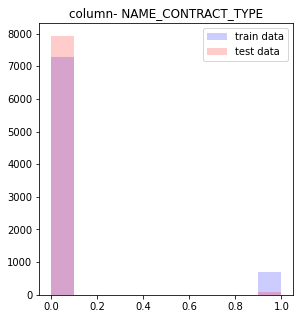

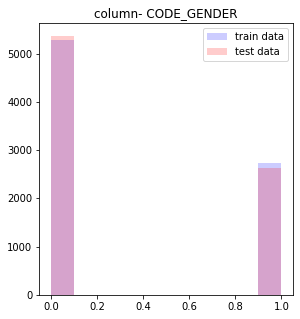

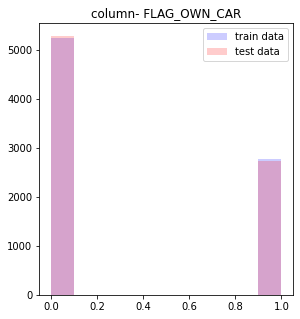

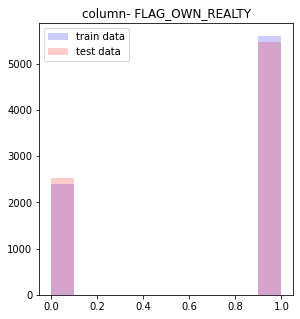

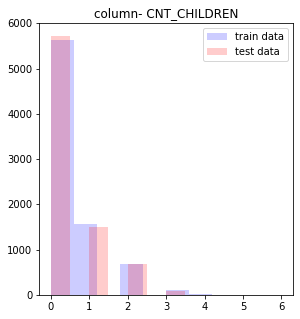

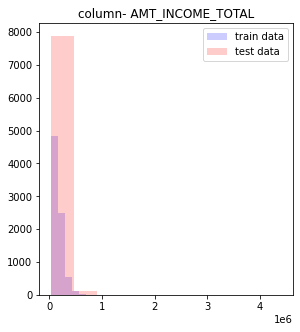

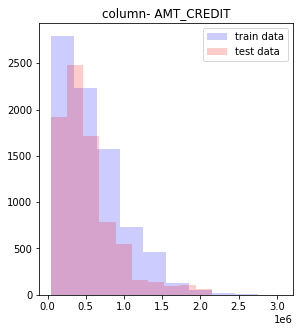

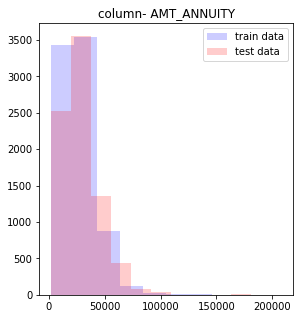

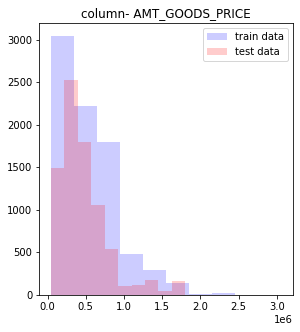

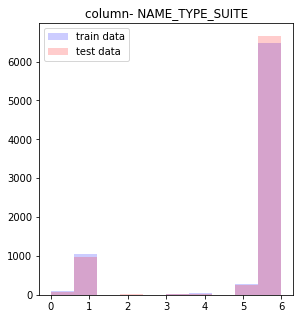

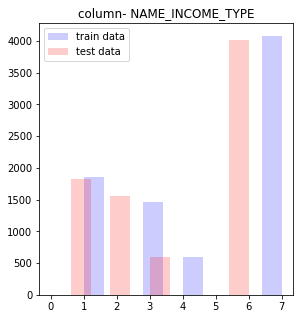

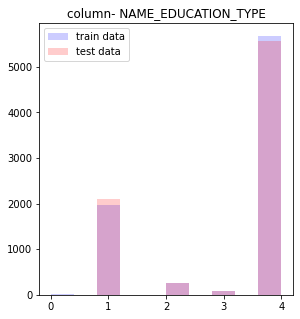

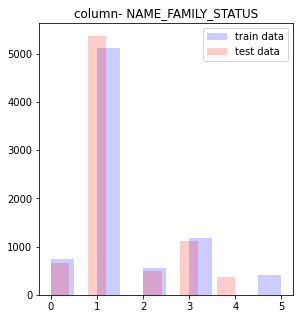

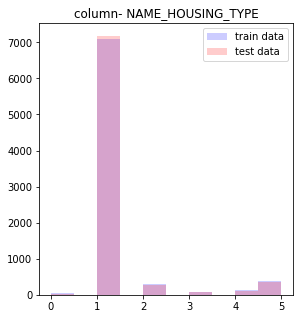

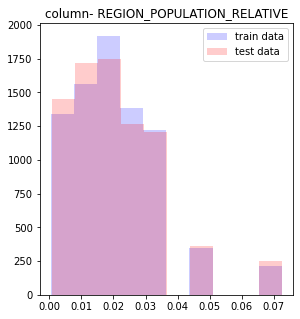

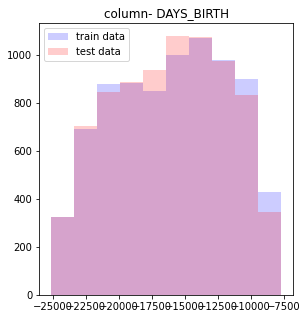

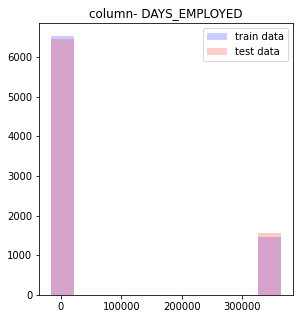

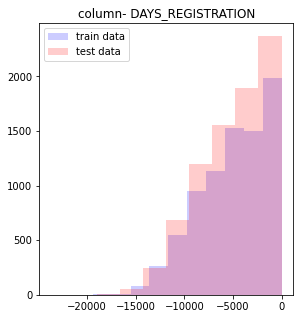

In [0]:
training=df_tr.sample(8000)
testing=df_ts.sample(8000)
bin_val=10
x = np.linspace( 0, 10, 8000)
for col in training.columns[2:20]: 
#for i in range(df_ts.size):
  #col='var_'+str(i)  
  #print(col)
  hist_1, bins = np.histogram(training[col], bins=bin_val,density=True) 
  hist_2, bins = np.histogram(testing[col], bins=bin_val,density=True)
  
  hist_r=hist_1/np.sum(hist_1)
  hist_s=hist_2/np.sum(hist_2)

  
  fig = plt.figure(figsize=(10,5))
  ax1 = fig.add_subplot(121) 
  ax1.hist(training[col], bins=10, color='blue',label='train data',alpha=0.2) 
  ax1.hist(testing[col], bins=10, color='red',label='test data', alpha=0.2) 

    
  ax1.set_title('column- '+col) 
  ax1.legend()
  


In [37]:
df_tr['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [39]:
#merge two dataset

if('TARGET' in df_tr.columns):
  del df_tr['TARGET']

df_tr['is_test'] = range(1, len(df_tr) + 1)
df_ts['is_test'] = range(1, len(df_ts) + 1)

df_tr['is_test'] = 0
df_ts['is_test'] = 1

df_merge=pd.concat([df_tr, df_ts], sort = False)

if('SK_ID_CURR' in df_merge.columns):
  del df_merge['SK_ID_CURR']

df_merge.head

<bound method NDFrame.head of       NAME_CONTRACT_TYPE CODE_GENDER  ... AMT_REQ_CREDIT_BUREAU_YEAR is_test
0                      0           1  ...                        1.0       0
1                      0           0  ...                        0.0       0
2                      1           1  ...                        0.0       0
3                      0           0  ...                        0.0       0
4                      0           1  ...                        0.0       0
...                  ...         ...  ...                        ...     ...
48739                  0           0  ...                        1.0       1
48740                  0           0  ...                        0.0       1
48741                  0           0  ...                        1.0       1
48742                  0           1  ...                        2.0       1
48743                  0           0  ...                        4.0       1

[356255 rows x 121 columns]>

In [40]:
df_merge=df_merge.sample(300000)

Y=df_merge['is_test']

if('is_test' in df_merge.columns):
  del df_merge['is_test']

X_train, X_test, y_train, y_test = train_test_split(df_merge,Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(240000, 120) (240000,)
(60000, 120) (60000,)


In [41]:
clf=DecisionTreeClassifier(max_depth=5)
# Building the model
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("ROC-AUC: ",accuracy_score(y_test, y_pred))

results = cross_val_score(clf, X_test, y_test, cv=10)
print("Score :",(results.mean()))


ROC-AUC:  0.9808
Score : 0.9825833333333334


In [0]:
#!apt-get -qq install -y https://github.com/srome/pykliep
#import pykliep

p_x=norm.pdf(Xtr)
q_x=norm.pdf(Xts)

# Estimate the density ratio w
dratio =densratio(p_x,q_x, kernel_num=30)

density_ratio = dratio.compute_density_ratio(p_x)
print(density_ratio)

In [0]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(Xtr,ytr,sample_weight=density_ratio)
y_pred2= reg.predict(Xts)

scr=reg.score(Xts,yts,sample_weight=density_ratio)
#----------------------------
#-----------------------------------
#print(yts[0:10])
#print(y_pred[0:10])

print("MSE = ", np.sqrt(mse(yts,y_pred2)))
scores = cross_val_score(reg, Xts, yts, cv=10, )
print("MSE rnge: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))
print("score",scr)

'''
7231738.024218656
MSE rnge: 0.18800204 +/- 0.29495058
score -1.3313805396503722
'''

MSE =  7111577.62828457
MSE rnge: 0.18800204 +/- 0.29495058
score -1.2545491473034924


'\n7231738.024218656\nMSE rnge: 0.18800204 +/- 0.29495058\nscore -1.3313805396503722\n'

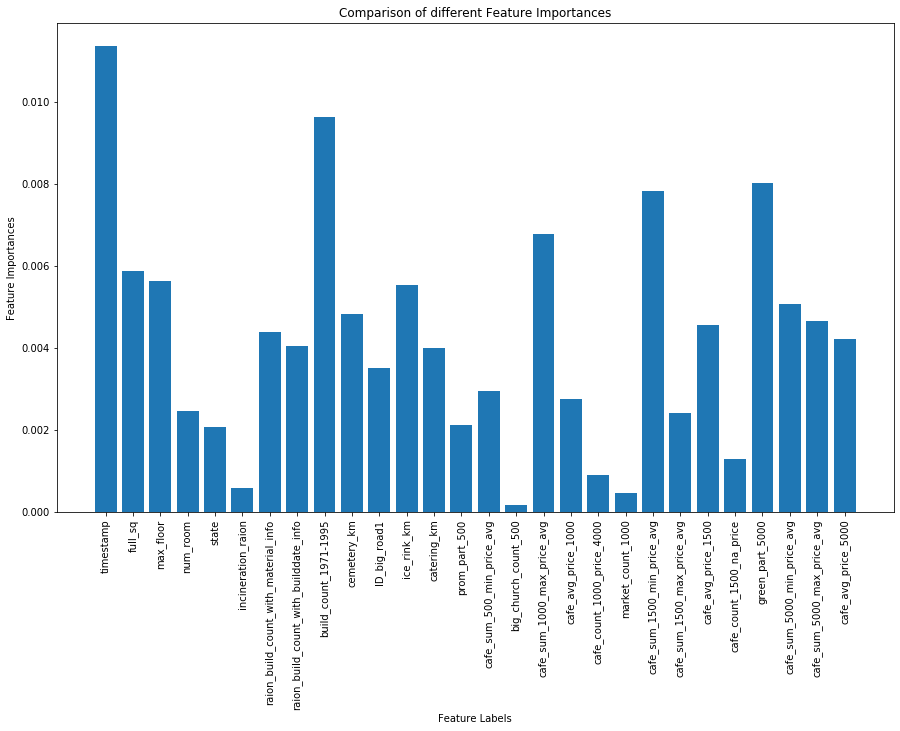

In [0]:
# Computing the importance of each feature 
feature_importance = regressor.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 
imp_arr=[]
column_arr=[]

for i in range(len(data_shift_kl)):
  result = np.where(X.columns.values == data_shift_kl[i])
  
  j=result[0][0]
  imp_arr.append(feature_importance_normalized[j])

for item in X.columns:
  if(feature_importance_normalized[i]<0.005):
    column_arr.append(item)
#-------------------------------------------------------
# Plotting a Bar Graph to compare the models 
fig = plt.figure(figsize=(15,9))
plt.bar(data_shift_kl,imp_arr)
#plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances')
plt.xticks(rotation='vertical')
plt.title('Comparison of different Feature Importances') 

plt.show()


In [0]:
#del_features=['material', 'build_year', 'incineration_raion', 'raion_build_count_with_material_info','build_count_1971-1995', 'cemetery_km', 'ID_big_road1','office_km', 'big_church_count_500', 'cafe_sum_1000_min_price_avg','cafe_count_1000_price_4000','cafe_count_1500_na_price','cafe_avg_price_5000']

#del_features=column_arr

X_new=X.copy()
X_test_new=X_test.copy()
y_new=y.copy()

#--------------------------------------
for i in range(len(data_shift_kl)):
  
  if(imp_arr[i]<0.04):
    del X_new[data_shift_kl[i]]
    del X_test_new[data_shift_kl[i]]
#------------------------------------------
'''
for ftr in del_features:
  if(ftr in X_new.columns):
    del X_new[ftr]
    del X_test_new[ftr]
'''
#--------------------------------
# Training the model 
extra_tree_forest.fit(X_new, y_new)
y_pred=extra_tree_forest.predict(X_test_new)
score=accuracy_score(y_new,y_pred)
 
print(score)
  

0.005
